In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 27.7 MB/s eta 0:0

In [2]:
#필요한 패키지 임포트
from google.colab import drive
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from pycaret.regression import *

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
#드라이브에서 필요한 엑셀 파일 불러오기
df_1 = pd.read_csv('/content/drive/MyDrive/7팀\/1_내원정보.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/7팀\/2_바탕질환.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/7팀\/4_항생제처방리스트.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/7팀\/6_배양검사결과.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/7팀\/7_치료결과.csv')

In [111]:
#중복치 제거
df_2=df_2.drop_duplicates(['RGNO'])
df_3=df_3.drop_duplicates(['RGNO'])
df_4=df_4.drop_duplicates(['RGNO'])
df_5=df_5.drop_duplicates(['RGNO'])
df_1=df_1.drop_duplicates(['RGNO'])

In [112]:
#데이터셋 합치기
x=['RGNO']
df1=pd.merge(df_3,df_1, on= x)
df1

,VTHOS_NO_x,RGNO,PRSC_CD,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,SEX_CD,AREA_ADRES,VTHOS_CLSF_CD,IADM_DEPTT_NM,DEPTT_NM,ADM_YMD,LTHT_YMD,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,0x751d9bfe5b6315c722d123d96d76dc484a6cbafb74c3...,D2TC3-01,3-TC(원내 필요시입고),Lamivudine,150.0,1,1,150.0,150.0,...,F,경기도 용인시,I,M8,GZ,20390527,20390816,NaN,NaN,NaN
1,0xf0e3f097ef93d123d5cc451ca2c7c5bf50bef60c3b69...,0x18ebf0d11b4f0aae06c8ff21d28a2ae07fa8ecfca97e...,D2ACLO01,Aclova,Acyclovir,200.0,5,1,1000.0,1000.0,...,M,경기도 용인시,I,M1,G1,20520615,20520620,NaN,NaN,NaN
2,0x8fd155b19bf24505ee75d867f3673733225aafc3b58a...,0xb0a2ca8155156a534c790dfc9643588f4a6e8453bdd5...,D2ACLO01,Aclova,Acyclovir,200.0,5,3,1000.0,1000.0,...,F,경기도 용인시,I,HM,HM,20340116,20340118,NaN,NaN,NaN
3,0x9ba02399e4b58b8120a5aa4f201850c671fe878060b3...,0xe31f749ccac8a6fc734229fd78734b71f08f0b0052e6...,D2ACLO01,Aclova,Acyclovir,200.0,5,7,1000.0,200.0,...,M,경기도 성남시,E,EM,EM,21020607,21020607,NaN,NaN,NaN
4,0x30c068c68bb12fffec992b53406459a92f576a6ead39...,0xf0d2bdc3b009e0a1a9d8c1055f399c19f1bcc92f76c1...,D2ACLO01,Aclova,Acyclovir,200.0,5,3,1000.0,1000.0,...,M,경기도 용인시,I,M3,M3,20550418,20550423,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71614,0x8e9534677c9f2583fd40d44a4fff47c578bcdcc162c8...,0x6782f087b067f3c48ee020e756298250fd2023e89d6d...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,28,1.0,1.0,...,F,경기도 이천시,I,HO,HO,21120618,21120623,NaN,NaN,NaN
71615,0xcffafbaab792f932f57d17ec30936d948d6828a5880d...,0x0f93b7894cdc0615f918045ed0559010d0aa5456371b...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,3,4.0,4.0,...,M,경기도 용인시,E,EM,P1,21030602,21030602,NaN,NaN,NaN
71616,0xeaa7a2d77b0e49eeb2ac727bf85a5ef889c189458373...,0xe90f3a55595af2235e169d5e8e96b66bb0d48dc12df8...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,14,1.0,1.0,...,M,경기도 용인시,E,EM,OS,20890826,20890826,NaN,NaN,NaN
71617,0x217641135e9f90aaa5986248bdf4ba8320c5885cd313...,0x5a077a0c635023946895e19c08921b655e0352b43df0...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,7,1.0,1.0,...,M,경기도 광주시,I,CM,CM,20580505,20580505,NaN,NaN,NaN


In [113]:
df2=pd.merge(df1,df_2, on= x)
df2

,VTHOS_NO_x,RGNO,PRSC_CD,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y,VTHOS_NO,ICD10CD,DIAG_NM,MAIN_DIAG_YN,ESB_TX_ID,ESB_STATE_CD,ESB_TIME
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,0x751d9bfe5b6315c722d123d96d76dc484a6cbafb74c3...,D2TC3-01,3-TC(원내 필요시입고),Lamivudine,150.0,1,1,150.0,150.0,...,NaN,NaN,NaN,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,B24,HIV infection(human immunodeficiency virus inf...,Y,NaN,NaN,NaN
1,0xf0e3f097ef93d123d5cc451ca2c7c5bf50bef60c3b69...,0x18ebf0d11b4f0aae06c8ff21d28a2ae07fa8ecfca97e...,D2ACLO01,Aclova,Acyclovir,200.0,5,1,1000.0,1000.0,...,NaN,NaN,NaN,0xf0e3f097ef93d123d5cc451ca2c7c5bf50bef60c3b69...,K81.0,Acute cholecystitis,Y,NaN,NaN,NaN
2,0x8fd155b19bf24505ee75d867f3673733225aafc3b58a...,0xb0a2ca8155156a534c790dfc9643588f4a6e8453bdd5...,D2ACLO01,Aclova,Acyclovir,200.0,5,3,1000.0,1000.0,...,NaN,NaN,NaN,0x8fd155b19bf24505ee75d867f3673733225aafc3b58a...,B02.9,Herpes zoster,Y,NaN,NaN,NaN
3,0x30c068c68bb12fffec992b53406459a92f576a6ead39...,0xf0d2bdc3b009e0a1a9d8c1055f399c19f1bcc92f76c1...,D2ACLO01,Aclova,Acyclovir,200.0,5,3,1000.0,1000.0,...,NaN,NaN,NaN,0x1c07d402b09472b10be29bffc0a2f7a5708fa96c9c71...,I48.0,Atrial fibrillation,Y,NaN,NaN,NaN
4,0x990c9c963c6831b5ff8ce537bc3406286bf80aa1e582...,0xcb1299745367bc77f4be835ae408fc918af2ddf7b7ef...,D2ACLO01,Aclova,Acyclovir,200.0,5,2,1000.0,1000.0,...,NaN,NaN,NaN,0x6d43ee4b2520cf64eeba1c700812a378d8d4cc476425...,M75.3,"Calcific tendinitis of shoulder, right",Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,0xf8400fdc6d3fc8574fec2c6d50e4b373d945b37fecd8...,0x997f73a7f48a77ccdda48ea29472af82f5fef6f45350...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,2,1,2.0,2.0,...,NaN,NaN,NaN,0xf8400fdc6d3fc8574fec2c6d50e4b373d945b37fecd8...,N04.1,Focal segmental glomerulosclerosis,Y,NaN,NaN,NaN
45658,0x8e9534677c9f2583fd40d44a4fff47c578bcdcc162c8...,0x6782f087b067f3c48ee020e756298250fd2023e89d6d...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,28,1.0,1.0,...,NaN,NaN,NaN,0x3eca3015499b4b4cba6520ae66fcab62ec18108f27dd...,C91.1,Chronic lymphocytic leukemia of B-cell type,Y,NaN,NaN,NaN
45659,0xeaa7a2d77b0e49eeb2ac727bf85a5ef889c189458373...,0xe90f3a55595af2235e169d5e8e96b66bb0d48dc12df8...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,14,1.0,1.0,...,NaN,NaN,NaN,0x9b39fa956d976729f70e0bdc844db68878527fe1715a...,D86.9,Sarcoidosis,Y,NaN,NaN,NaN
45660,0x217641135e9f90aaa5986248bdf4ba8320c5885cd313...,0x5a077a0c635023946895e19c08921b655e0352b43df0...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,1,7,1.0,1.0,...,NaN,NaN,NaN,0xf887fc30666bb8370fbe2bfe460c55a066de08e3a297...,R91,Abnormal chest X-ray,Y,NaN,NaN,NaN


In [114]:
df3=pd.merge(df2,df_4, on= x)
df3

,VTHOS_NO_x,RGNO,PRSC_CD_x,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,EXAM_NM,SEXAM_NM,GERM_SEQ,GERM_NM,ANTBT_NM,EXAM_MTH,RSLT_CONT,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,0x751d9bfe5b6315c722d123d96d76dc484a6cbafb74c3...,D2TC3-01,3-TC(원내 필요시입고),Lamivudine,150.00,1,1,150.00,150.00,...,Bacterial culture,Bacterial culture,1.0,Enterobacter bugandensis,Amoxicillin/Clavulanic acid,M,R,NaN,NaN,NaN
1,0x8eea8f8548fc7e3cfeb2896c41835ab60900a82022b2...,0x182213f19c2526087cd1353bbd7194492047cb181ecf...,D2ACLO01,Aclova,Acyclovir,200.00,5,5,1000.00,200.00,...,Bacterial culture,Bacterial culture,1.0,Staphylococcus epidermidis,Ciprofloxacin,M,S,NaN,NaN,NaN
2,0xdb32fd437dea012b63a86e976cae5f5a1e7c922881f3...,0x81e0bff7172c9c6857db2cf7dc201dbb5c469d332ec6...,D2ACLO01,Aclova,Acyclovir,200.00,4,1,800.00,600.00,...,Bacterial culture,Bacterial culture,NaN,Pseudomonas aeruginosa,Amikacin,Z,S,NaN,NaN,NaN
3,0x42d4386d078dec5be2cd2fd82336c4e0941804b9fcdd...,0x9b5da5bb1671c4cf2f052fd0ad6ff2a2495dbde21acd...,D2ACLO01,Aclova,Acyclovir,200.00,4,7,800.00,200.00,...,Bacterial culture,Bacterial culture,NaN,Pseudomonas aeruginosa,Amikacin,Z,S,NaN,NaN,NaN
4,0xec001e6148868ab6122d112a063e1e48ccf7a3c5fbfb...,0x1acbb9b3a353132e433970881e87cb09db4f4226d421...,D2ACLO01,Aclova,Acyclovir,200.00,2,1,400.00,400.00,...,Bacterial culture,Bacterial culture,1.0,Streptococcus oralis,Ampicillin,M,I,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,0xaee58b5688eed86af435303bc0877767c76b6f7610d5...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.00,2,1,4.00,2.00,...,Bacterial culture,Bacterial culture,NaN,Escherichia coli,Amikacin,Z,S,NaN,NaN,NaN
8322,0x56b7dd8798240c3e582dacf1725096d81f1e7c1f8142...,0x4e6d6e27b551bfe4135d8a97792936ba91e2685e5118...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.00,3,1,3.00,1.00,...,Bacterial culture,Bacterial culture,NaN,Enterococcus faecalis,Ampicillin,Z,S,NaN,NaN,NaN
8323,0x50a73a9de8a28d45e321bcc86d2dc1354bd8fd1c5528...,0x24ab55465efe63d41cbb12ad698716e0013682dea172...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.00,2,1,4.00,2.00,...,Bacterial culture,Bacterial culture,1.0,Escherichia coli,Amoxicillin/Clavulanic acid,M,I,NaN,NaN,NaN
8324,0x18fb8508c6f050826b00ef08b16b41b89921de874ad0...,0xb98bbc774f783abbd609a2bf8b466edd3ee665f5aa3d...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",0.33,2,1,0.66,0.66,...,Bacterial culture,Bacterial culture,1.0,Klebsiella aerogenes (Enterobacter aerogenes),Amoxicillin/Clavulanic acid,M,R,NaN,NaN,NaN


In [115]:
df4=pd.merge(df3,df_5, on= x)
df4

,VTHOS_NO_x,RGNO,PRSC_CD_x,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,RSLT_CONT_x,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y,VTHOS_NO,RSLT_CONT_y,WTHN30_REHOSP_YN,ESB_TX_ID,ESB_STATE_CD,ESB_TIME
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,0x751d9bfe5b6315c722d123d96d76dc484a6cbafb74c3...,D2TC3-01,3-TC(원내 필요시입고),Lamivudine,150.00,1,1,150.00,150.00,...,R,NaN,NaN,NaN,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,경쾌,Y,NaN,NaN,NaN
1,0x8eea8f8548fc7e3cfeb2896c41835ab60900a82022b2...,0x182213f19c2526087cd1353bbd7194492047cb181ecf...,D2ACLO01,Aclova,Acyclovir,200.00,5,5,1000.00,200.00,...,S,NaN,NaN,NaN,0x583e3fe20b1b245a40e72638c8f7cc43825985baec6b...,경쾌,Y,NaN,NaN,NaN
2,0xdb32fd437dea012b63a86e976cae5f5a1e7c922881f3...,0x81e0bff7172c9c6857db2cf7dc201dbb5c469d332ec6...,D2ACLO01,Aclova,Acyclovir,200.00,4,1,800.00,600.00,...,S,NaN,NaN,NaN,0x5ff4d9c6824fb08a2e36e9d6a017cd03e77b3270404e...,경쾌,Y,NaN,NaN,NaN
3,0x42d4386d078dec5be2cd2fd82336c4e0941804b9fcdd...,0x9b5da5bb1671c4cf2f052fd0ad6ff2a2495dbde21acd...,D2ACLO01,Aclova,Acyclovir,200.00,4,7,800.00,200.00,...,S,NaN,NaN,NaN,0x9dd347fdc473c8a3e6b4c472396486a29aa6b89e095b...,경쾌,Y,NaN,NaN,NaN
4,0xec001e6148868ab6122d112a063e1e48ccf7a3c5fbfb...,0x1acbb9b3a353132e433970881e87cb09db4f4226d421...,D2ACLO01,Aclova,Acyclovir,200.00,2,1,400.00,400.00,...,I,NaN,NaN,NaN,0xec001e6148868ab6122d112a063e1e48ccf7a3c5fbfb...,경쾌,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,0xaee58b5688eed86af435303bc0877767c76b6f7610d5...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.00,2,1,4.00,2.00,...,S,NaN,NaN,NaN,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,경쾌,Y,NaN,NaN,NaN
8322,0x56b7dd8798240c3e582dacf1725096d81f1e7c1f8142...,0x4e6d6e27b551bfe4135d8a97792936ba91e2685e5118...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.00,3,1,3.00,1.00,...,S,NaN,NaN,NaN,0x803f76a319ad7f51f1e018ada8c723057ab16a517a8c...,경쾌,Y,NaN,NaN,NaN
8323,0x50a73a9de8a28d45e321bcc86d2dc1354bd8fd1c5528...,0x24ab55465efe63d41cbb12ad698716e0013682dea172...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.00,2,1,4.00,2.00,...,I,NaN,NaN,NaN,0x50a73a9de8a28d45e321bcc86d2dc1354bd8fd1c5528...,경쾌,Y,NaN,NaN,NaN
8324,0x18fb8508c6f050826b00ef08b16b41b89921de874ad0...,0xb98bbc774f783abbd609a2bf8b466edd3ee665f5aa3d...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",0.33,2,1,0.66,0.66,...,R,NaN,NaN,NaN,0x18fb8508c6f050826b00ef08b16b41b89921de874ad0...,경쾌,N,NaN,NaN,NaN


In [116]:
df5 = df4[(df4['RSLT_CONT_x']=='S') | (df4['RSLT_CONT_x']=='NEG')]
df5

,VTHOS_NO_x,RGNO,PRSC_CD_x,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,RSLT_CONT_x,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y,VTHOS_NO,RSLT_CONT_y,WTHN30_REHOSP_YN,ESB_TX_ID,ESB_STATE_CD,ESB_TIME
1,0x8eea8f8548fc7e3cfeb2896c41835ab60900a82022b2...,0x182213f19c2526087cd1353bbd7194492047cb181ecf...,D2ACLO01,Aclova,Acyclovir,200.0,5,5,1000.0,200.0,...,S,NaN,NaN,NaN,0x583e3fe20b1b245a40e72638c8f7cc43825985baec6b...,경쾌,Y,NaN,NaN,NaN
2,0xdb32fd437dea012b63a86e976cae5f5a1e7c922881f3...,0x81e0bff7172c9c6857db2cf7dc201dbb5c469d332ec6...,D2ACLO01,Aclova,Acyclovir,200.0,4,1,800.0,600.0,...,S,NaN,NaN,NaN,0x5ff4d9c6824fb08a2e36e9d6a017cd03e77b3270404e...,경쾌,Y,NaN,NaN,NaN
3,0x42d4386d078dec5be2cd2fd82336c4e0941804b9fcdd...,0x9b5da5bb1671c4cf2f052fd0ad6ff2a2495dbde21acd...,D2ACLO01,Aclova,Acyclovir,200.0,4,7,800.0,200.0,...,S,NaN,NaN,NaN,0x9dd347fdc473c8a3e6b4c472396486a29aa6b89e095b...,경쾌,Y,NaN,NaN,NaN
5,0xde87f5a743a2b3d1c9aaefbb9f0d21ce755ab70587e7...,0xdb58184807821a7821186d938e8f66dc9160cde0e11b...,D2ACLO01,Aclova,Acyclovir,200.0,2,1,400.0,400.0,...,S,NaN,NaN,NaN,0xde87f5a743a2b3d1c9aaefbb9f0d21ce755ab70587e7...,경쾌,Y,NaN,NaN,NaN
7,0xbe7ea2972827b15d31b90c014ce26de6a66498f9c77b...,0x972e9c9df3c7c713ba529213348eac5a4dca73206ad3...,D2ACLO01,Aclova,Acyclovir,200.0,2,1,400.0,400.0,...,S,NaN,NaN,NaN,0xbe7ea2972827b15d31b90c014ce26de6a66498f9c77b...,경쾌,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,0x97559885203ac0138d9beaeef336f99e971eab4f3831...,0xa862949226c263ccbe473ce670bfa5b77e2a9e68e8e1...,D1TAZO06,TazoPERAN inj,"Piperacillin Na 4g,Tazobactam 0.5g(IVF)(Na 4.7...",4.5,4,1,18.0,4.5,...,S,NaN,NaN,NaN,0x97559885203ac0138d9beaeef336f99e971eab4f3831...,48시간이후 사망,N,NaN,NaN,NaN
8320,0xda3795ce9630637fdd99788632d11deb86281af926eb...,0xb7a35cbdd7abde4f94963cc2d785c66899d6e1d5eafc...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,4.0,...,S,NaN,NaN,NaN,0xda3795ce9630637fdd99788632d11deb86281af926eb...,경쾌,N,NaN,NaN,NaN
8321,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,0xaee58b5688eed86af435303bc0877767c76b6f7610d5...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,2.0,...,S,NaN,NaN,NaN,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,경쾌,Y,NaN,NaN,NaN
8322,0x56b7dd8798240c3e582dacf1725096d81f1e7c1f8142...,0x4e6d6e27b551bfe4135d8a97792936ba91e2685e5118...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,3,1,3.0,1.0,...,S,NaN,NaN,NaN,0x803f76a319ad7f51f1e018ada8c723057ab16a517a8c...,경쾌,Y,NaN,NaN,NaN


In [117]:
#경쾌와 완쾌만 남기고 나머지 제거
final_2= df5[(df5['RSLT_CONT_y']=='경쾌') | (df5['RSLT_CONT_y']=='완쾌')]

In [118]:
#나이 조정
final_2 = final_2.replace('80대', '80세 이상')
final_2 = final_2.replace('90대', '80세 이상')
final_2 = final_2.replace('100세 이상', '80세 이상')

In [119]:
#나이의 유니크 값 확인
final_2['AGRDE'].unique()

array(['80세 이상', '50대', '60대', '40대', '70대', '10대', '30대', '20대', '10대미만'],
      dtype=object)

In [120]:
#성별/나이에 알맞는 체중 부여
final_2.loc[(final_2['AGRDE'] == '10대미만') & (final_2['SEX_CD'] == 'M'), "체중"] = 22.83
final_2.loc[(final_2['AGRDE'] == '10대') & (final_2['SEX_CD'] == 'M'), "체중"] = 73.79
final_2.loc[(final_2['AGRDE'] == '20대') & (final_2['SEX_CD'] == 'M'), "체중"] = 76.20
final_2.loc[(final_2['AGRDE'] == '30대') & (final_2['SEX_CD'] == 'M'), "체중"] = 79.19
final_2.loc[(final_2['AGRDE'] == '40대') & (final_2['SEX_CD'] == 'M'), "체중"] = 76.95
final_2.loc[(final_2['AGRDE'] == '50대') & (final_2['SEX_CD'] == 'M'), "체중"] = 72.78
final_2.loc[(final_2['AGRDE'] == '60대') & (final_2['SEX_CD'] == 'M'), "체중"] = 69.37
final_2.loc[(final_2['AGRDE'] == '70대') & (final_2['SEX_CD'] == 'M'), "체중"] = 66.46
final_2.loc[(final_2['AGRDE'] == '80세 이상') & (final_2['SEX_CD'] == 'M'), "체중"] = 63.04

In [121]:
final_2.loc[(final_2['AGRDE'] == '10대미만') & (final_2['SEX_CD'] == 'F'), "체중"] = 21.83
final_2.loc[(final_2['AGRDE'] == '10대') & (final_2['SEX_CD'] == 'F'), "체중"] = 59.87
final_2.loc[(final_2['AGRDE'] == '20대') & (final_2['SEX_CD'] == 'F'), "체중"] = 57.98
final_2.loc[(final_2['AGRDE'] == '30대') & (final_2['SEX_CD'] == 'F'), "체중"] = 59.53
final_2.loc[(final_2['AGRDE'] == '40대') & (final_2['SEX_CD'] == 'F'), "체중"] = 59.65
final_2.loc[(final_2['AGRDE'] == '50대') & (final_2['SEX_CD'] == 'F'), "체중"] = 58.93
final_2.loc[(final_2['AGRDE'] == '60대') & (final_2['SEX_CD'] == 'F'), "체중"] = 58.35
final_2.loc[(final_2['AGRDE'] == '70대') & (final_2['SEX_CD'] == 'F'), "체중"] = 57.28
final_2.loc[(final_2['AGRDE'] == '80세 이상') & (final_2['SEX_CD'] == 'F'), "체중"] = 53.26

In [122]:
#성별/나이에 알맞는 신장 부여
final_2.loc[(final_2['AGRDE'] == '10대미만') & (final_2['SEX_CD'] == 'M'), "신장"] = 116.53
final_2.loc[(final_2['AGRDE'] == '10대') & (final_2['SEX_CD'] == 'M'), "신장"] = 174.01
final_2.loc[(final_2['AGRDE'] == '20대') & (final_2['SEX_CD'] == 'M'), "신장"] = 174.35
final_2.loc[(final_2['AGRDE'] == '30대') & (final_2['SEX_CD'] == 'M'), "신장"] = 174.65
final_2.loc[(final_2['AGRDE'] == '40대') & (final_2['SEX_CD'] == 'M'), "신장"] = 173.29
final_2.loc[(final_2['AGRDE'] == '50대') & (final_2['SEX_CD'] == 'M'), "신장"] = 170.47
final_2.loc[(final_2['AGRDE'] == '60대') & (final_2['SEX_CD'] == 'M'), "신장"] = 167.82
final_2.loc[(final_2['AGRDE'] == '70대') & (final_2['SEX_CD'] == 'M'), "신장"] = 165.47
final_2.loc[(final_2['AGRDE'] == '80세 이상') & (final_2['SEX_CD'] == 'M'), "신장"] = 163.54

In [123]:
final_2.loc[(final_2['AGRDE'] == '10대미만') & (final_2['SEX_CD'] == 'F'), "신장"] = 115.34
final_2.loc[(final_2['AGRDE'] == '10대') & (final_2['SEX_CD'] == 'F'), "신장"] = 161.50
final_2.loc[(final_2['AGRDE'] == '20대') & (final_2['SEX_CD'] == 'F'), "신장"] = 161.77
final_2.loc[(final_2['AGRDE'] == '30대') & (final_2['SEX_CD'] == 'F'), "신장"] = 161.77
final_2.loc[(final_2['AGRDE'] == '40대') & (final_2['SEX_CD'] == 'F'), "신장"] = 160.39
final_2.loc[(final_2['AGRDE'] == '50대') & (final_2['SEX_CD'] == 'F'), "신장"] = 157.69
final_2.loc[(final_2['AGRDE'] == '60대') & (final_2['SEX_CD'] == 'F'), "신장"] = 155.15
final_2.loc[(final_2['AGRDE'] == '70대') & (final_2['SEX_CD'] == 'F'), "신장"] = 152.34
final_2.loc[(final_2['AGRDE'] == '80세 이상') & (final_2['SEX_CD'] == 'F'), "신장"] = 148.80

In [124]:
#인덱스 초기화
final_3=final_2.reset_index()
final_3.drop(["index"], axis=1)

,VTHOS_NO_x,RGNO,PRSC_CD_x,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,...,ESB_STATE_CD_y,ESB_TIME_y,VTHOS_NO,RSLT_CONT_y,WTHN30_REHOSP_YN,ESB_TX_ID,ESB_STATE_CD,ESB_TIME,체중,신장
0,0x8eea8f8548fc7e3cfeb2896c41835ab60900a82022b2...,0x182213f19c2526087cd1353bbd7194492047cb181ecf...,D2ACLO01,Aclova,Acyclovir,200.0,5,5,1000.0,200.0,...,NaN,NaN,0x583e3fe20b1b245a40e72638c8f7cc43825985baec6b...,경쾌,Y,NaN,NaN,NaN,53.26,148.80
1,0xdb32fd437dea012b63a86e976cae5f5a1e7c922881f3...,0x81e0bff7172c9c6857db2cf7dc201dbb5c469d332ec6...,D2ACLO01,Aclova,Acyclovir,200.0,4,1,800.0,600.0,...,NaN,NaN,0x5ff4d9c6824fb08a2e36e9d6a017cd03e77b3270404e...,경쾌,Y,NaN,NaN,NaN,63.04,163.54
2,0x42d4386d078dec5be2cd2fd82336c4e0941804b9fcdd...,0x9b5da5bb1671c4cf2f052fd0ad6ff2a2495dbde21acd...,D2ACLO01,Aclova,Acyclovir,200.0,4,7,800.0,200.0,...,NaN,NaN,0x9dd347fdc473c8a3e6b4c472396486a29aa6b89e095b...,경쾌,Y,NaN,NaN,NaN,58.93,157.69
3,0xde87f5a743a2b3d1c9aaefbb9f0d21ce755ab70587e7...,0xdb58184807821a7821186d938e8f66dc9160cde0e11b...,D2ACLO01,Aclova,Acyclovir,200.0,2,1,400.0,400.0,...,NaN,NaN,0xde87f5a743a2b3d1c9aaefbb9f0d21ce755ab70587e7...,경쾌,Y,NaN,NaN,NaN,58.35,155.15
4,0xbe7ea2972827b15d31b90c014ce26de6a66498f9c77b...,0x972e9c9df3c7c713ba529213348eac5a4dca73206ad3...,D2ACLO01,Aclova,Acyclovir,200.0,2,1,400.0,400.0,...,NaN,NaN,0xbe7ea2972827b15d31b90c014ce26de6a66498f9c77b...,경쾌,Y,NaN,NaN,NaN,76.95,173.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,0xe0b34a1d68d7a18602e2ce95e4eb344130ddf6ca2f80...,0x709752df97ea9d29e7c7e803b47ddab42535363ac126...,D1TAZO06,TazoPERAN inj,"Piperacillin Na 4g,Tazobactam 0.5g(IVF)(Na 4.7...",4.5,1,1,4.5,4.5,...,NaN,NaN,0xfa1c281a9498ab95ea263d449794d7bdb472f658e255...,경쾌,Y,NaN,NaN,NaN,63.04,163.54
5841,0xda3795ce9630637fdd99788632d11deb86281af926eb...,0xb7a35cbdd7abde4f94963cc2d785c66899d6e1d5eafc...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,4.0,...,NaN,NaN,0xda3795ce9630637fdd99788632d11deb86281af926eb...,경쾌,N,NaN,NaN,NaN,53.26,148.80
5842,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,0xaee58b5688eed86af435303bc0877767c76b6f7610d5...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,2.0,...,NaN,NaN,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,경쾌,Y,NaN,NaN,NaN,57.28,152.34
5843,0x56b7dd8798240c3e582dacf1725096d81f1e7c1f8142...,0x4e6d6e27b551bfe4135d8a97792936ba91e2685e5118...,D2SEPT04,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,3,1,3.0,1.0,...,NaN,NaN,0x803f76a319ad7f51f1e018ada8c723057ab16a517a8c...,경쾌,Y,NaN,NaN,NaN,57.98,161.77


In [125]:
#결측치 확인
final_3.isnull().sum()

index              0
VTHOS_NO_x         0
RGNO               0
PRSC_CD_x          0
MD_NM              0
                ... 
ESB_TX_ID       5845
ESB_STATE_CD    5845
ESB_TIME        5845
체중                 0
신장                 0
Length: 64, dtype: int64

In [126]:
#결측치 제거
final_3=final_3.dropna(axis=1)
final_3.isnull().sum()

index               0
VTHOS_NO_x          0
RGNO                0
PRSC_CD_x           0
MD_NM               0
INGR_NM             0
PRSC_CAPA           0
PRSC_NT             0
PRSC_DCNT           0
TPRSC_CAPA          0
IMPL_CAPA           0
PRSC_UNIT           0
BS_CTQTY            0
PRSC_YMD            0
FRGN_ADMS_CD        0
PRSC_CLS_NM         0
LTHT_DPRSC_YN       0
ESB_TX_ID_x         0
ESB_STATE_CD_x      0
ESB_TIME_x          0
VTHOS_NO_y          0
AGRDE               0
SEX_CD              0
AREA_ADRES          0
VTHOS_CLSF_CD       0
IADM_DEPTT_NM       0
DEPTT_NM            0
ADM_YMD             0
LTHT_YMD            0
VTHOS_NO_x          0
ICD10CD             0
DIAG_NM             0
MAIN_DIAG_YN        0
VTHOS_NO_y          0
PRSC_CD_y           0
RSLT_INP_YMD        0
SPCM_NM             0
EXAM_NM             0
SEXAM_NM            0
ANTBT_NM            0
EXAM_MTH            0
RSLT_CONT_x         0
VTHOS_NO            0
RSLT_CONT_y         0
WTHN30_REHOSP_YN    0
체중        

In [128]:
#중복 컬럼 값 제거
df=final_3.drop(['index','VTHOS_NO_x','RGNO','PRSC_CD_x','ESB_TX_ID_x','ESB_STATE_CD_x','ESB_TIME_x','VTHOS_NO_y','VTHOS_NO_x','RSLT_CONT_x','VTHOS_NO_y'], axis=1)
df

,MD_NM,INGR_NM,PRSC_CAPA,PRSC_NT,PRSC_DCNT,TPRSC_CAPA,IMPL_CAPA,PRSC_UNIT,BS_CTQTY,PRSC_YMD,...,SPCM_NM,EXAM_NM,SEXAM_NM,ANTBT_NM,EXAM_MTH,VTHOS_NO,RSLT_CONT_y,WTHN30_REHOSP_YN,체중,신장
0,Aclova,Acyclovir,200.0,5,5,1000.0,200.0,mg,200.0,20331230,...,Deep Wound Foot,Bacterial culture,Bacterial culture,Ciprofloxacin,M,0x583e3fe20b1b245a40e72638c8f7cc43825985baec6b...,경쾌,Y,53.26,148.80
1,Aclova,Acyclovir,200.0,4,1,800.0,600.0,mg,200.0,20480614,...,Sputum1,Bacterial culture,Bacterial culture,Amikacin,Z,0x5ff4d9c6824fb08a2e36e9d6a017cd03e77b3270404e...,경쾌,Y,63.04,163.54
2,Aclova,Acyclovir,200.0,4,7,800.0,200.0,mg,200.0,20200515,...,Sputum1,Bacterial culture,Bacterial culture,Amikacin,Z,0x9dd347fdc473c8a3e6b4c472396486a29aa6b89e095b...,경쾌,Y,58.93,157.69
3,Aclova,Acyclovir,200.0,2,1,400.0,400.0,mg,200.0,20520405,...,Random Urine,Bacterial culture,Bacterial culture,Amoxicillin/Clavulanic acid,M,0xde87f5a743a2b3d1c9aaefbb9f0d21ce755ab70587e7...,경쾌,Y,58.35,155.15
4,Aclova,Acyclovir,200.0,2,1,400.0,400.0,mg,200.0,21030819,...,Random Urine,Bacterial culture,Bacterial culture,Ciprofloxacin,M,0xbe7ea2972827b15d31b90c014ce26de6a66498f9c77b...,경쾌,Y,76.95,173.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,TazoPERAN inj,"Piperacillin Na 4g,Tazobactam 0.5g(IVF)(Na 4.7...",4.5,1,1,4.5,4.5,g,4.5,20541219,...,Sputum1,"Bacterial culture, Gram stain",Bacterial culture,Amikacin,M,0xfa1c281a9498ab95ea263d449794d7bdb472f658e255...,경쾌,Y,63.04,163.54
5841,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,4.0,T*,1.0,20411004,...,Random Urine,Bacterial culture,Bacterial culture,Amikacin,Z,0xda3795ce9630637fdd99788632d11deb86281af926eb...,경쾌,N,53.26,148.80
5842,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",2.0,2,1,4.0,2.0,T*,1.0,20240903,...,Random Urine,Bacterial culture,Bacterial culture,Amikacin,Z,0x49a2932bb6a31b8c081da70057d8484de6973ee93805...,경쾌,Y,57.28,152.34
5843,Septrin,"Sulfamethoxazole 400mg, Trimethoprim 80mg",1.0,3,1,3.0,1.0,T*,1.0,20440802,...,Random Urine,Bacterial culture,Bacterial culture,Ampicillin,Z,0x803f76a319ad7f51f1e018ada8c723057ab16a517a8c...,경쾌,Y,57.98,161.77


In [129]:
#단위의 유니크 값 확인
df['PRSC_UNIT'].value_counts()

mg    5246
g      495
ml     100
T*       4
Name: PRSC_UNIT, dtype: int64

In [130]:
#특정 단위 제거
df = df[df.PRSC_UNIT != 'ml']

In [131]:
df = df[df.PRSC_UNIT != 'T*']
df['PRSC_UNIT'].value_counts()

mg    5246
g      495
Name: PRSC_UNIT, dtype: int64

In [132]:
#문자혈 데이터를 수치형 데이터로 변환하기 위한 인코딩
enc_classes = {}
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

In [133]:
#인코딩 / 낫 인코딩 / 타겟 으로 구분
encoding_columns = ['AGRDE','SEX_CD','INGR_NM','FRGN_ADMS_CD','PRSC_CLS_NM','LTHT_DPRSC_YN','DEPTT_NM','VTHOS_CLSF_CD','SPCM_NM','EXAM_NM','WTHN30_REHOSP_YN','MD_NM','IADM_DEPTT_NM','SEXAM_NM','ANTBT_NM','EXAM_MTH','RSLT_CONT_y','체중','ICD10CD','DIAG_NM','MAIN_DIAG_YN','PRSC_UNIT']
not_encoding_columns = ['PRSC_CAPA',	'PRSC_NT'	,'PRSC_DCNT','IMPL_CAPA'	,'BS_CTQTY']
target = ['TPRSC_CAPA']

In [134]:
#문자형 데이터 인코딩
d1 = df[encoding_columns].apply(encoding_label)
d1

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,PRSC_CLS_NM,LTHT_DPRSC_YN,DEPTT_NM,VTHOS_CLSF_CD,SPCM_NM,EXAM_NM,...,IADM_DEPTT_NM,SEXAM_NM,ANTBT_NM,EXAM_MTH,RSLT_CONT_y,체중,ICD10CD,DIAG_NM,MAIN_DIAG_YN,PRSC_UNIT
0,8,0,0,1,2,0,37,1,37,1,...,36,1,10,0,0,2,732,1338,1,1
1,8,1,0,0,2,0,5,1,64,1,...,5,1,0,1,0,10,446,1171,1,1
2,5,0,0,1,2,0,7,0,64,1,...,3,1,0,1,0,6,446,1171,1,1
3,6,0,0,0,2,0,30,1,63,1,...,28,1,1,0,0,5,139,984,1,1
4,4,1,0,0,2,0,35,1,63,1,...,34,1,10,0,0,16,139,984,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,7,1,84,0,0,0,27,1,0,1,...,26,1,1,0,0,11,592,523,1,0
5837,6,1,84,0,0,0,45,1,63,1,...,44,1,3,0,0,12,683,435,1,0
5838,6,1,84,0,0,0,37,1,64,2,...,36,1,1,0,0,12,407,1426,1,0
5839,6,1,84,0,0,0,33,1,63,1,...,38,1,3,1,0,12,499,425,1,0


In [135]:
# 기존의 수치형 데이터
d2 = df[not_encoding_columns]
d2

,PRSC_CAPA,PRSC_NT,PRSC_DCNT,IMPL_CAPA,BS_CTQTY
0,200.0,5,5,200.0,200.0
1,200.0,4,1,600.0,200.0
2,200.0,4,7,200.0,200.0
3,200.0,2,1,400.0,200.0
4,200.0,2,1,400.0,200.0
...,...,...,...,...,...
5836,4.5,4,1,13.5,4.5
5837,4.5,4,1,4.5,4.5
5838,4.5,4,1,9.0,4.5
5839,4.5,3,1,9.0,4.5


In [136]:
#타겟 데이터
d3 = df[target]
d3

,TPRSC_CAPA
0,1000.0
1,800.0
2,800.0
3,400.0
4,400.0
...,...
5836,18.0
5837,18.0
5838,18.0
5839,13.5


In [137]:
#수치형 데이터 스케일링 MinMaxScaler()
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(d2)

# 훈련 데이터 스케일링
X_train_scaled = minmax_scaler.transform(d2)
print(X_train_scaled)

[[7.40556927e-03 8.00000000e-01 4.81927711e-02 7.40556927e-03
  1.99599800e-01]
 [7.40556927e-03 6.00000000e-01 0.00000000e+00 2.22204115e-02
  1.99599800e-01]
 [7.40556927e-03 6.00000000e-01 7.22891566e-02 7.40556927e-03
  1.99599800e-01]
 ...
 [1.64815120e-04 6.00000000e-01 0.00000000e+00 3.31482095e-04
  4.00200100e-03]
 [1.64815120e-04 4.00000000e-01 0.00000000e+00 3.31482095e-04
  4.00200100e-03]
 [1.64815120e-04 0.00000000e+00 0.00000000e+00 1.64815120e-04
  4.00200100e-03]]


In [138]:
d2_s=pd.DataFrame(X_train_scaled)
d2_s

,0,1,2,3,4
0,0.007406,0.8,0.048193,0.007406,0.199600
1,0.007406,0.6,0.000000,0.022220,0.199600
2,0.007406,0.6,0.072289,0.007406,0.199600
3,0.007406,0.2,0.000000,0.014813,0.199600
4,0.007406,0.2,0.000000,0.014813,0.199600
...,...,...,...,...,...
5736,0.000165,0.6,0.000000,0.000498,0.004002
5737,0.000165,0.6,0.000000,0.000165,0.004002
5738,0.000165,0.6,0.000000,0.000331,0.004002
5739,0.000165,0.4,0.000000,0.000331,0.004002


In [139]:
d2_s.rename(columns={0: 'PRSC_CAPA'}, inplace=True)
d2_s.rename(columns={1: 'PRSC_NT'}, inplace=True)
d2_s.rename(columns={2: 'PRSC_DCNT'}, inplace=True)
d2_s.rename(columns={3: 'IMPL_CAPA'}, inplace=True)
d2_s.rename(columns={4: 'BS_CTQTY'}, inplace=True)
d2_s

,PRSC_CAPA,PRSC_NT,PRSC_DCNT,IMPL_CAPA,BS_CTQTY
0,0.007406,0.8,0.048193,0.007406,0.199600
1,0.007406,0.6,0.000000,0.022220,0.199600
2,0.007406,0.6,0.072289,0.007406,0.199600
3,0.007406,0.2,0.000000,0.014813,0.199600
4,0.007406,0.2,0.000000,0.014813,0.199600
...,...,...,...,...,...
5736,0.000165,0.6,0.000000,0.000498,0.004002
5737,0.000165,0.6,0.000000,0.000165,0.004002
5738,0.000165,0.6,0.000000,0.000331,0.004002
5739,0.000165,0.4,0.000000,0.000331,0.004002


In [140]:
d1=d1.reset_index(drop=True)
d3=d3.reset_index(drop=True)

In [141]:
df_L = d1.join(d2_s)
df_L

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,PRSC_CLS_NM,LTHT_DPRSC_YN,DEPTT_NM,VTHOS_CLSF_CD,SPCM_NM,EXAM_NM,...,체중,ICD10CD,DIAG_NM,MAIN_DIAG_YN,PRSC_UNIT,PRSC_CAPA,PRSC_NT,PRSC_DCNT,IMPL_CAPA,BS_CTQTY
0,8,0,0,1,2,0,37,1,37,1,...,2,732,1338,1,1,0.007406,0.8,0.048193,0.007406,0.199600
1,8,1,0,0,2,0,5,1,64,1,...,10,446,1171,1,1,0.007406,0.6,0.000000,0.022220,0.199600
2,5,0,0,1,2,0,7,0,64,1,...,6,446,1171,1,1,0.007406,0.6,0.072289,0.007406,0.199600
3,6,0,0,0,2,0,30,1,63,1,...,5,139,984,1,1,0.007406,0.2,0.000000,0.014813,0.199600
4,4,1,0,0,2,0,35,1,63,1,...,16,139,984,1,1,0.007406,0.2,0.000000,0.014813,0.199600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,7,1,84,0,0,0,27,1,0,1,...,11,592,523,1,0,0.000165,0.6,0.000000,0.000498,0.004002
5737,6,1,84,0,0,0,45,1,63,1,...,12,683,435,1,0,0.000165,0.6,0.000000,0.000165,0.004002
5738,6,1,84,0,0,0,37,1,64,2,...,12,407,1426,1,0,0.000165,0.6,0.000000,0.000331,0.004002
5739,6,1,84,0,0,0,33,1,63,1,...,12,499,425,1,0,0.000165,0.4,0.000000,0.000331,0.004002


In [142]:
df_L = df_L.join(d3)
df_L

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,PRSC_CLS_NM,LTHT_DPRSC_YN,DEPTT_NM,VTHOS_CLSF_CD,SPCM_NM,EXAM_NM,...,ICD10CD,DIAG_NM,MAIN_DIAG_YN,PRSC_UNIT,PRSC_CAPA,PRSC_NT,PRSC_DCNT,IMPL_CAPA,BS_CTQTY,TPRSC_CAPA
0,8,0,0,1,2,0,37,1,37,1,...,732,1338,1,1,0.007406,0.8,0.048193,0.007406,0.199600,1000.0
1,8,1,0,0,2,0,5,1,64,1,...,446,1171,1,1,0.007406,0.6,0.000000,0.022220,0.199600,800.0
2,5,0,0,1,2,0,7,0,64,1,...,446,1171,1,1,0.007406,0.6,0.072289,0.007406,0.199600,800.0
3,6,0,0,0,2,0,30,1,63,1,...,139,984,1,1,0.007406,0.2,0.000000,0.014813,0.199600,400.0
4,4,1,0,0,2,0,35,1,63,1,...,139,984,1,1,0.007406,0.2,0.000000,0.014813,0.199600,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,7,1,84,0,0,0,27,1,0,1,...,592,523,1,0,0.000165,0.6,0.000000,0.000498,0.004002,18.0
5737,6,1,84,0,0,0,45,1,63,1,...,683,435,1,0,0.000165,0.6,0.000000,0.000165,0.004002,18.0
5738,6,1,84,0,0,0,37,1,64,2,...,407,1426,1,0,0.000165,0.6,0.000000,0.000331,0.004002,18.0
5739,6,1,84,0,0,0,33,1,63,1,...,499,425,1,0,0.000165,0.4,0.000000,0.000331,0.004002,13.5


In [143]:
#상관관계 분석
corr_df = df_L.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,PRSC_CLS_NM,LTHT_DPRSC_YN,DEPTT_NM,VTHOS_CLSF_CD,SPCM_NM,EXAM_NM,...,ICD10CD,DIAG_NM,MAIN_DIAG_YN,PRSC_UNIT,PRSC_CAPA,PRSC_NT,PRSC_DCNT,IMPL_CAPA,BS_CTQTY,TPRSC_CAPA
AGRDE,1.00,-0.09,0.13,0.02,0.00,0.01,0.01,0.08,-0.03,0.08,...,-0.03,0.02,-0.03,-0.00,-0.00,-0.18,0.05,-0.03,-0.07,-0.03
SEX_CD,-0.09,1.00,0.04,-0.05,-0.01,-0.05,-0.05,0.04,-0.12,0.09,...,-0.05,0.04,0.01,0.05,0.10,0.07,0.02,0.08,0.12,0.10
INGR_NM,0.13,0.04,1.00,-0.10,0.02,-0.09,0.06,0.02,-0.02,0.07,...,0.00,0.02,0.00,-0.00,-0.04,-0.07,-0.06,-0.07,0.05,-0.06
FRGN_ADMS_CD,0.02,-0.05,-0.10,1.00,0.05,-0.35,-0.01,-0.08,0.03,-0.06,...,-0.00,-0.01,-0.03,0.15,-0.04,-0.01,0.25,-0.14,0.00,-0.08
PRSC_CLS_NM,0.00,-0.01,0.02,0.05,1.00,-0.07,-0.02,-0.02,0.01,0.03,...,-0.05,0.00,0.01,0.05,-0.05,-0.06,0.09,-0.05,-0.07,-0.05
LTHT_DPRSC_YN,0.01,-0.05,-0.09,-0.35,-0.07,1.00,-0.10,-0.02,-0.07,-0.07,...,0.01,-0.07,0.01,0.20,-0.18,0.00,0.42,-0.05,-0.23,-0.17
DEPTT_NM,0.01,-0.05,0.06,-0.01,-0.02,-0.10,1.00,0.33,0.06,-0.03,...,0.16,0.02,-0.01,-0.02,0.08,0.04,-0.08,0.05,0.05,0.09
VTHOS_CLSF_CD,0.08,0.04,0.02,-0.08,-0.02,-0.02,0.33,1.00,-0.03,0.05,...,-0.04,0.04,-0.00,-0.09,-0.03,-0.02,0.00,-0.02,-0.06,-0.02
SPCM_NM,-0.03,-0.12,-0.02,0.03,0.01,-0.07,0.06,-0.03,1.00,0.13,...,0.08,0.04,0.03,-0.06,-0.02,-0.02,-0.08,-0.01,-0.02,-0.01
EXAM_NM,0.08,0.09,0.07,-0.06,0.03,-0.07,-0.03,0.05,0.13,1.00,...,-0.06,0.05,0.02,-0.06,-0.00,-0.08,-0.05,-0.02,-0.00,-0.04


In [144]:
#타겟 값의 상관관계 계수 추출
corr_df.loc['TPRSC_CAPA']

AGRDE              -0.03
SEX_CD              0.10
INGR_NM            -0.06
FRGN_ADMS_CD       -0.08
PRSC_CLS_NM        -0.05
LTHT_DPRSC_YN      -0.17
DEPTT_NM            0.09
VTHOS_CLSF_CD      -0.02
SPCM_NM            -0.01
EXAM_NM            -0.04
WTHN30_REHOSP_YN    0.03
MD_NM              -0.26
IADM_DEPTT_NM       0.06
SEXAM_NM            0.00
ANTBT_NM            0.19
EXAM_MTH            0.09
RSLT_CONT_y        -0.01
체중                  0.13
ICD10CD             0.11
DIAG_NM            -0.05
MAIN_DIAG_YN       -0.01
PRSC_UNIT           0.18
PRSC_CAPA           0.84
PRSC_NT             0.62
PRSC_DCNT          -0.15
IMPL_CAPA           0.84
BS_CTQTY            0.60
TPRSC_CAPA          1.00
Name: TPRSC_CAPA, dtype: float64

In [324]:
#상관관계 높은 컬럼들만 추출
a= ['AGRDE','SEX_CD','INGR_NM','FRGN_ADMS_CD','LTHT_DPRSC_YN','DEPTT_NM','MD_NM','ANTBT_NM','체중','ICD10CD','BS_CTQTY','PRSC_UNIT','PRSC_NT','IMPL_CAPA','TPRSC_CAPA']
b= ['AGRDE','SEX_CD','INGR_NM','FRGN_ADMS_CD','LTHT_DPRSC_YN','DEPTT_NM','MD_NM','ANTBT_NM','체중','ICD10CD','BS_CTQTY','PRSC_UNIT','PRSC_NT','TPRSC_CAPA']

In [325]:
#최종 데이터 셋 완성
df=df_L[a]
df

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,IMPL_CAPA,TPRSC_CAPA
0,8,0,0,1,0,37,0,10,2,732,0.199600,1,0.8,0.007406,1000.0
1,8,1,0,0,0,5,0,0,10,446,0.199600,1,0.6,0.022220,800.0
2,5,0,0,1,0,7,0,0,6,446,0.199600,1,0.6,0.007406,800.0
3,6,0,0,0,0,30,0,1,5,139,0.199600,1,0.2,0.014813,400.0
4,4,1,0,0,0,35,0,10,16,139,0.199600,1,0.2,0.014813,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,7,1,84,0,0,27,98,1,11,592,0.004002,0,0.6,0.000498,18.0
5737,6,1,84,0,0,45,98,3,12,683,0.004002,0,0.6,0.000165,18.0
5738,6,1,84,0,0,37,98,1,12,407,0.004002,0,0.6,0.000331,18.0
5739,6,1,84,0,0,33,98,3,12,499,0.004002,0,0.4,0.000331,13.5


In [326]:
#독립변수와 종속변수 분리
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [327]:
X

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,IMPL_CAPA
0,8,0,0,1,0,37,0,10,2,732,0.199600,1,0.8,0.007406
1,8,1,0,0,0,5,0,0,10,446,0.199600,1,0.6,0.022220
2,5,0,0,1,0,7,0,0,6,446,0.199600,1,0.6,0.007406
3,6,0,0,0,0,30,0,1,5,139,0.199600,1,0.2,0.014813
4,4,1,0,0,0,35,0,10,16,139,0.199600,1,0.2,0.014813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,7,1,84,0,0,27,98,1,11,592,0.004002,0,0.6,0.000498
5737,6,1,84,0,0,45,98,3,12,683,0.004002,0,0.6,0.000165
5738,6,1,84,0,0,37,98,1,12,407,0.004002,0,0.6,0.000331
5739,6,1,84,0,0,33,98,3,12,499,0.004002,0,0.4,0.000331


In [328]:
y

0       1000.0
1        800.0
2        800.0
3        400.0
4        400.0
         ...  
5736      18.0
5737      18.0
5738      18.0
5739      13.5
5740       4.5
Name: TPRSC_CAPA, Length: 5741, dtype: float64

In [329]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [330]:
#train, test 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [258]:
#xgboost 사용
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [259]:
xg_reg.fit(X_train,y_train)

[05:56:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [287]:
pred_1 = xg_reg.predict(X_test)

In [288]:
pred_1=pd.DataFrame(pred_1)

In [289]:
pred_1

,0
0,257.080658
1,603.939880
2,200.873764
3,1152.784180
4,759.432190
...,...
1144,543.679443
1145,226.398636
1146,1017.706299
1147,403.711792


In [262]:
# 1번째 결과 값
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1352.105698


In [263]:
#교차 검증을 통한 파리미터 값 조정
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[05:56:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [264]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2404.966218,85.299812,2401.622746,186.390546
1,2282.170035,124.874383,2277.673994,148.512599
2,2145.115787,108.702491,2145.115181,157.447163
3,2002.386611,105.963673,2003.587148,153.522731
4,1920.771431,125.250077,1922.699266,133.479430


In [265]:
# 파라미터 값을 조정한 2차 결과 값
print((cv_results["test-rmse-mean"]).tail(1))

49    1005.174629
Name: test-rmse-mean, dtype: float64


In [266]:
# 파이케럿 사용을 위한 셋업
sup = setup(df, target = 'TPRSC_CAPA', train_size = 0.8)

,Description,Value
0,Session id,4808
1,Target,TPRSC_CAPA
2,Target type,Regression
3,Original data shape,"(5741, 14)"
4,Transformed data shape,"(5741, 14)"
5,Transformed train set shape,"(4592, 14)"
6,Transformed test set shape,"(1149, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [267]:
#파이케럿에서 모델 비교
comp = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,341.3166,931885.7526,935.7899,0.8254,0.8708,3.4431,0.8760
rf,Random Forest Regressor,287.8667,979553.1665,960.1364,0.8129,0.2956,0.2564,1.5210
lightgbm,Light Gradient Boosting Machine,326.8536,1020083.6994,973.4706,0.8093,0.7452,2.2272,0.9540
et,Extra Trees Regressor,294.4659,1078660.4063,1006.3594,0.7945,0.2972,0.2578,1.4220
xgboost,Extreme Gradient Boosting,346.7653,1123801.4688,1040.3802,0.7825,0.8086,2.6483,0.6010
dt,Decision Tree Regressor,298.0563,1475185.8817,1194.8995,0.7137,0.3413,0.1711,0.1740
ada,AdaBoost Regressor,728.7702,1619330.7438,1263.8180,0.6810,1.8176,45.5386,0.5650
ridge,Ridge Regression,809.5667,1957836.3023,1385.3402,0.6231,1.7533,48.5258,0.1960
br,Bayesian Ridge,810.2132,1957777.4383,1385.3569,0.6231,1.7539,48.7202,0.2720
llar,Lasso Least Angle Regression,809.5699,1957899.1931,1385.3789,0.6231,1.7579,48.7853,0.1670


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [269]:
#성능 높은 3가지 모델 추출
top1 = create_model('gbr', cross_validation = False)
top2 = create_model('rf', cross_validation = False)
top3 = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,309.0584,600693.1858,775.0440,0.8675,0.8146,2.6353


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,242.0889,559216.4352,747.8078,0.8766,0.2578,0.1622


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,282.1805,561818.5146,749.5455,0.8761,0.7175,1.9367


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [276]:
# TOP1 튜닝
tuned_gbr = tune_model(top1, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,285.7283,490054.3159,700.0388,0.8560,1.0051,3.3906
1,341.8722,614278.3110,783.7591,0.8888,0.9558,5.8832
2,413.4774,1114495.8727,1055.6969,0.8109,0.8232,2.1164
3,352.6798,925408.9250,961.9818,0.7625,0.8886,4.0816
4,324.6678,711106.4373,843.2713,0.8597,0.8139,7.6492
5,377.9430,1022592.8964,1011.2334,0.8280,0.9494,4.2829
6,332.3313,636815.8749,798.0074,0.8772,0.9371,3.2540
7,393.8818,1535606.4821,1239.1959,0.7603,0.9234,4.2575
8,333.9525,796794.3328,892.6334,0.7925,0.8367,2.5476


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [271]:
# TOP2 튜닝
tuned_rf = tune_model(top2, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,267.1525,414182.2196,643.5699,0.8783,0.6891,1.3705
1,343.8757,715347.5481,845.7822,0.8705,0.6810,2.1401
2,416.5303,1221132.2437,1105.0485,0.7928,0.6814,2.7079
3,286.8390,541391.2091,735.7929,0.8611,0.7389,4.6842
4,304.9769,629722.0616,793.5503,0.8758,0.6623,2.6354
5,350.7647,767858.7394,876.2755,0.8709,0.7784,4.9337
6,314.4742,658695.4230,811.6005,0.8730,0.6256,2.1986
7,384.9437,1520512.3328,1233.0906,0.7626,0.7113,3.3842
8,321.2243,749492.2614,865.7322,0.8048,0.5600,0.8771


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [272]:
#TOP3 튜닝
tuned_lightgbm = tune_model(top3, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,250.3217,379700.3938,616.1983,0.8884,0.9212,3.3283
1,328.5994,658033.5409,811.1927,0.8808,0.8903,4.6031
2,405.0912,1278451.2045,1130.6862,0.7831,0.8831,3.0117
3,295.8576,568858.7552,754.2273,0.8540,0.9011,4.0617
4,322.0531,742246.8401,861.5375,0.8536,0.8596,7.3920
5,340.6293,839774.3941,916.3921,0.8588,0.9320,5.4238
6,316.0913,640406.0979,800.2538,0.8765,0.9285,3.5626
7,381.0595,1468062.6489,1211.6364,0.7708,0.9005,4.0655
8,323.7979,788475.9719,887.9617,0.7946,0.8447,2.0178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [341]:
#TOP1~3 블렌딩
blender_specific = blend_models(estimator_list = [tuned_gbr, tuned_rf, tuned_lightgbm],optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,222.5087,365683.3045,604.7175,0.9370,0.7069,2.3709
1,181.2656,362560.1620,602.1297,0.9249,0.6401,1.5213
2,187.4508,314252.1961,560.5820,0.9444,0.5601,1.2476
3,173.6020,261309.5472,511.1845,0.9440,0.7249,2.2383
4,188.3042,803296.7549,896.2682,0.8513,0.6004,1.6052
5,196.8947,364069.8751,603.3820,0.9156,0.5812,1.1722
6,201.6738,490513.7601,700.3669,0.9075,0.5899,1.9764
7,178.5477,381148.8341,617.3725,0.8888,0.6835,1.9365
8,244.8812,1067374.9462,1033.1384,0.7911,0.5964,1.1135


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [307]:
#모델 적용
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,273.1878,626709.9956,791.6502,0.8754,0.6446,1.8461


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


In [292]:
#예측 값 확인
pred

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,prediction_label
4980,0,1,28,0,1,36,93,3,14,0,0.099550,1,0.2,230.347675
3018,8,0,43,0,1,33,27,1,2,792,0.499750,1,0.2,1007.629191
4819,8,0,28,0,1,34,93,0,2,766,0.099550,1,0.2,237.319025
1083,7,0,11,0,0,27,9,1,3,102,0.624812,1,0.4,2051.407478
4733,7,1,85,0,0,27,89,1,11,1104,0.959980,1,0.0,1411.143330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,7,0,43,0,0,40,29,0,3,775,0.249625,1,0.0,500.510797
569,6,0,4,1,0,34,4,0,5,866,0.249625,1,0.0,270.070263
1085,4,1,11,1,0,37,9,3,16,407,0.624812,1,0.0,1235.487129
4465,8,0,69,0,0,16,63,1,2,73,0.749875,1,0.0,823.645923


In [293]:
pred = pred.join(y_test)
pred

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,prediction_label,TPRSC_CAPA
4980,0,1,28,0,1,36,93,3,14,0,0.099550,1,0.2,230.347675,200.0
3018,8,0,43,0,1,33,27,1,2,792,0.499750,1,0.2,1007.629191,1000.0
4819,8,0,28,0,1,34,93,0,2,766,0.099550,1,0.2,237.319025,200.0
1083,7,0,11,0,0,27,9,1,3,102,0.624812,1,0.4,2051.407478,1875.0
4733,7,1,85,0,0,27,89,1,11,1104,0.959980,1,0.0,1411.143330,2688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,7,0,43,0,0,40,29,0,3,775,0.249625,1,0.0,500.510797,500.0
569,6,0,4,1,0,34,4,0,5,866,0.249625,1,0.0,270.070263,250.0
1085,4,1,11,1,0,37,9,3,16,407,0.624812,1,0.0,1235.487129,2500.0
4465,8,0,69,0,0,16,63,1,2,73,0.749875,1,0.0,823.645923,750.0


In [294]:
pred=pred.reset_index()

In [298]:
pred_2 = pd.concat([pred,pred_1],axis=1)

In [299]:
pred_2=pred_2.sort_values('TPRSC_CAPA')

In [300]:
pred_2=pred_2.reset_index()

In [301]:
pred_2

,level_0,index,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,prediction_label,TPRSC_CAPA,0
0,397,2288,7,0,54,0,0,16,14,3,3,47,0.000000,1,0.0,59.160242,0.5,165.598434
1,133,2299,7,0,54,0,0,49,14,10,3,631,0.000000,1,0.0,50.374416,0.5,165.598434
2,684,5638,7,1,55,0,0,40,59,1,11,767,0.000500,0,0.0,5.890478,0.5,195.221710
3,922,5616,1,0,34,0,0,14,32,1,0,265,0.000500,0,0.0,-30.349643,0.6,160.676498
4,1022,5465,1,0,39,0,0,14,25,3,0,0,0.000500,0,0.0,-34.079181,0.7,-15.376141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,496,193,5,0,15,0,0,45,1,10,6,627,0.749875,1,0.6,10079.314070,12000.0,4300.725586
1145,554,457,8,0,15,0,0,3,1,3,2,412,0.749875,1,0.6,9263.483175,12000.0,4203.385254
1146,259,382,6,1,15,0,0,3,1,1,12,1010,0.749875,1,0.6,9779.667897,12000.0,4167.630859
1147,857,112,6,0,15,0,0,45,1,0,5,665,0.749875,1,0.6,8564.269842,12000.0,4190.448242


<Axes: >

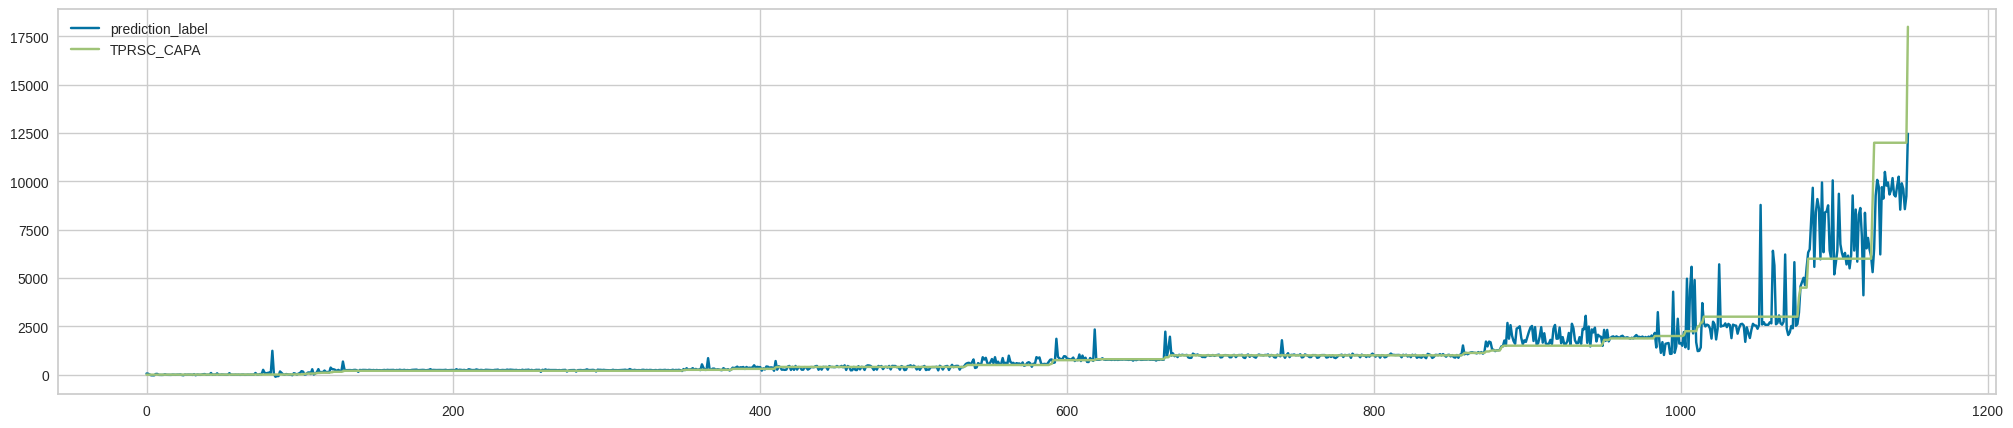

In [286]:
#시각화
pred[['prediction_label','TPRSC_CAPA']].plot(figsize=(25, 5))

<Axes: >

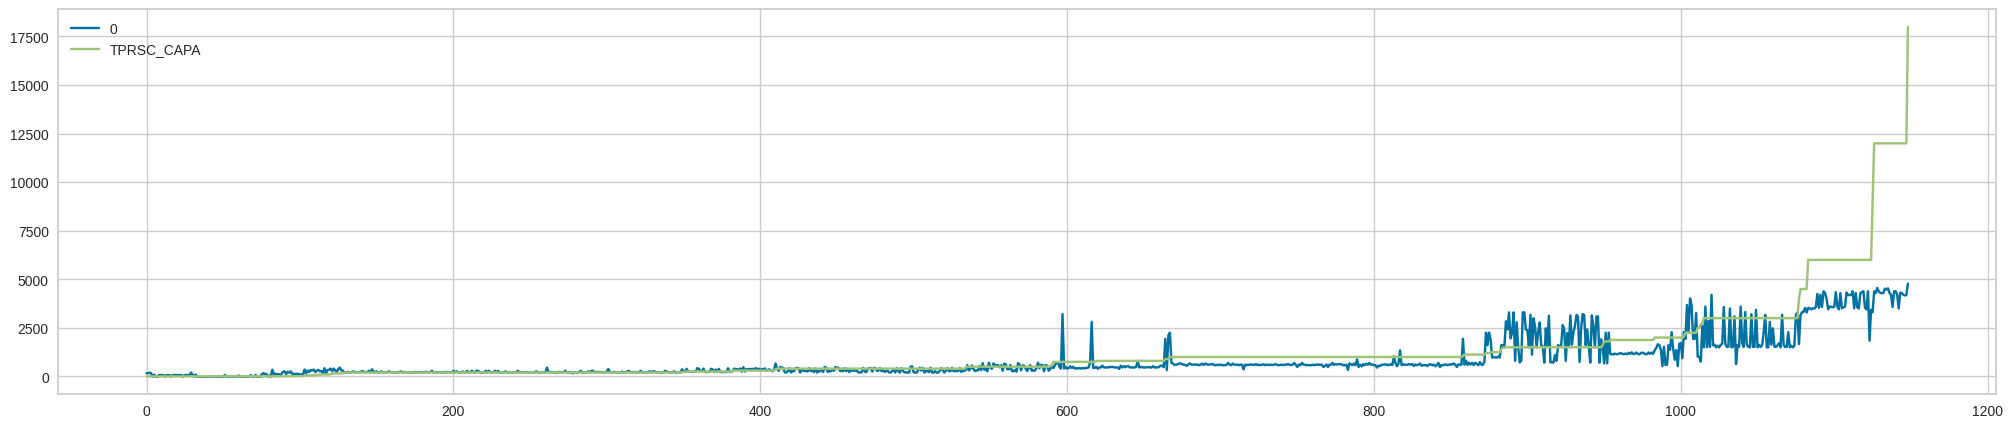

In [306]:
pred_2[[0,'TPRSC_CAPA']].plot(figsize=(25, 5))

In [312]:
# 파이케럿 사용을 위한 셋업
sup = setup(df, target = 'TPRSC_CAPA', train_size = 0.8)

,Description,Value
0,Session id,7236
1,Target,TPRSC_CAPA
2,Target type,Regression
3,Original data shape,"(5741, 15)"
4,Transformed data shape,"(5741, 15)"
5,Transformed train set shape,"(4592, 15)"
6,Transformed test set shape,"(1149, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [313]:
#파이케럿에서 모델 비교
comp = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,202.4348,440188.8208,654.4870,0.9109,0.6727,2.0040,0.7220
et,Extra Trees Regressor,129.9905,505928.6699,695.5631,0.8958,0.1308,0.0488,1.1030
rf,Random Forest Regressor,147.8514,539269.1573,711.9136,0.8910,0.1360,0.0539,1.5010
xgboost,Extreme Gradient Boosting,176.1047,561226.4281,729.6822,0.8859,0.4870,1.2496,0.8670
lightgbm,Light Gradient Boosting Machine,179.0010,573612.6963,737.6262,0.8842,0.4364,0.6435,0.5850
dt,Decision Tree Regressor,141.6496,809905.7711,881.7177,0.8371,0.1679,0.0505,0.2410
ada,AdaBoost Regressor,487.9653,822536.6194,897.4924,0.8359,1.5427,25.9776,0.3760
lr,Linear Regression,524.6418,900084.9954,945.5816,0.8171,1.6105,29.1777,0.9680
lar,Least Angle Regression,524.6418,900084.9954,945.5816,0.8171,1.6105,29.1777,0.5970
br,Bayesian Ridge,524.9925,900089.9998,945.5931,0.8171,1.6116,29.2303,0.2150


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [314]:
#성능 높은 3가지 모델 추출
top1 = create_model('gbr', cross_validation = False)
top2 = create_model('et', cross_validation = False)
top3 = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,228.8231,440681.4508,663.8384,0.9140,0.6362,1.4738


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,157.4845,539837.1507,734.7361,0.8946,0.1190,0.0386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,164.2717,451000.2910,671.5656,0.9120,0.1181,0.0437


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [315]:
# TOP1 튜닝
tuned_gbr = tune_model(top1, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,243.1155,398668.5700,631.4021,0.9313,0.9061,3.9724
1,194.9227,352721.3502,593.9035,0.9269,0.8059,2.5233
2,238.9314,359193.9567,599.3279,0.9365,0.9578,4.9503
3,239.3904,347695.4330,589.6570,0.9254,1.0628,5.2972
4,237.3644,810835.6971,900.4642,0.8499,0.9086,5.0552
5,243.8956,416987.2863,645.7455,0.9034,0.9008,4.0456
6,253.9446,576282.7514,759.1329,0.8914,0.8165,5.4887
7,232.4642,462118.9685,679.7933,0.8652,1.0449,5.4086
8,283.4243,649619.9130,805.9900,0.8729,0.9327,4.5551


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [316]:
# TOP2 튜닝
tuned_et = tune_model(top2, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,224.0647,601986.3839,775.8778,0.8962,0.3642,0.4547
1,183.8839,546858.9498,739.4991,0.8867,0.2307,0.1782
2,171.1565,368244.1752,606.8313,0.9349,0.2335,0.1824
3,146.6971,332233.6472,576.3971,0.9288,0.2558,0.2180
4,160.5262,837261.0085,915.0197,0.8450,0.2943,0.2919
5,169.6833,452697.3173,672.8279,0.8951,0.2872,0.1991
6,173.4899,577131.8790,759.6920,0.8912,0.2867,0.3241
7,158.1593,464490.0020,681.5350,0.8645,0.2635,0.2301
8,194.8620,1218748.5556,1103.9695,0.7615,0.2400,0.1489


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [317]:
# TOP3 튜닝
tuned_rf = tune_model(top3, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,275.4505,414470.9778,643.7942,0.9286,0.8640,3.6253
1,238.0286,403825.7160,635.4728,0.9163,0.8350,3.1905
2,244.4542,361602.5811,601.3340,0.9360,0.7954,3.0723
3,218.7722,265988.9151,515.7411,0.9430,0.9412,5.0309
4,236.3433,840060.2108,916.5480,0.8445,0.7972,3.3752
5,241.2021,396471.0510,629.6595,0.9081,0.7306,1.7720
6,249.7490,504378.6954,710.1962,0.9049,0.7685,3.6557
7,215.2115,403397.8484,635.1361,0.8823,0.8761,3.7957
8,317.2107,1403607.6646,1184.7395,0.7253,0.7773,1.7650


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [318]:
blender_specific = blend_models(estimator_list = [tuned_gbr, tuned_et, tuned_rf],optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,201.0776,333850.9802,577.7984,0.9424,0.6847,2.0757
1,168.4390,352423.2080,593.6524,0.9270,0.6082,1.3438
2,168.2243,261480.3417,511.3515,0.9538,0.5426,1.1646
3,162.7605,300406.6729,548.0937,0.9356,0.7256,2.2384
4,183.1507,778426.2087,882.2847,0.8559,0.5677,1.4529
5,197.1576,398357.4305,631.1556,0.9077,0.5565,0.9725
6,177.2493,413594.6462,643.1132,0.9220,0.5726,1.9454
7,168.5350,381341.2386,617.5283,0.8887,0.6736,1.8247
8,230.2141,964531.6482,982.1057,0.8113,0.6061,1.0604


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [331]:
final_model = finalize_model(blender_specific)
pred_last = predict_model(final_model, data=X_test)

In [333]:
pred_last_2 = pred_last.join(y_test)
pred_last_2

,AGRDE,SEX_CD,INGR_NM,FRGN_ADMS_CD,LTHT_DPRSC_YN,DEPTT_NM,MD_NM,ANTBT_NM,체중,ICD10CD,BS_CTQTY,PRSC_UNIT,PRSC_NT,IMPL_CAPA,prediction_label,TPRSC_CAPA
4980,0,1,28,0,1,36,93,3,14,0,0.099550,1,0.2,0.007406,204.646759,200.0
3018,8,0,43,0,1,33,27,1,2,792,0.499750,1,0.2,0.037035,1004.706463,1000.0
4819,8,0,28,0,1,34,93,0,2,766,0.099550,1,0.2,0.007406,214.350783,200.0
1083,7,0,11,0,0,27,9,1,3,102,0.624812,1,0.4,0.069443,1979.688931,1875.0
4733,7,1,85,0,0,27,89,1,11,1104,0.959980,1,0.0,0.099554,2317.722083,2688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,7,0,43,0,0,40,29,0,3,775,0.249625,1,0.0,0.018517,588.632382,500.0
569,6,0,4,1,0,34,4,0,5,866,0.249625,1,0.0,0.009257,281.949104,250.0
1085,4,1,11,1,0,37,9,3,16,407,0.624812,1,0.0,0.092591,2292.909047,2500.0
4465,8,0,69,0,0,16,63,1,2,73,0.749875,1,0.0,0.027776,780.670373,750.0


In [337]:
pred_last_2=pred_last_2.reset_index()

In [338]:
pred_last_2=pred_last_2.sort_values('TPRSC_CAPA')

In [339]:
pred_last_2=pred_last_2.reset_index()

<Axes: >

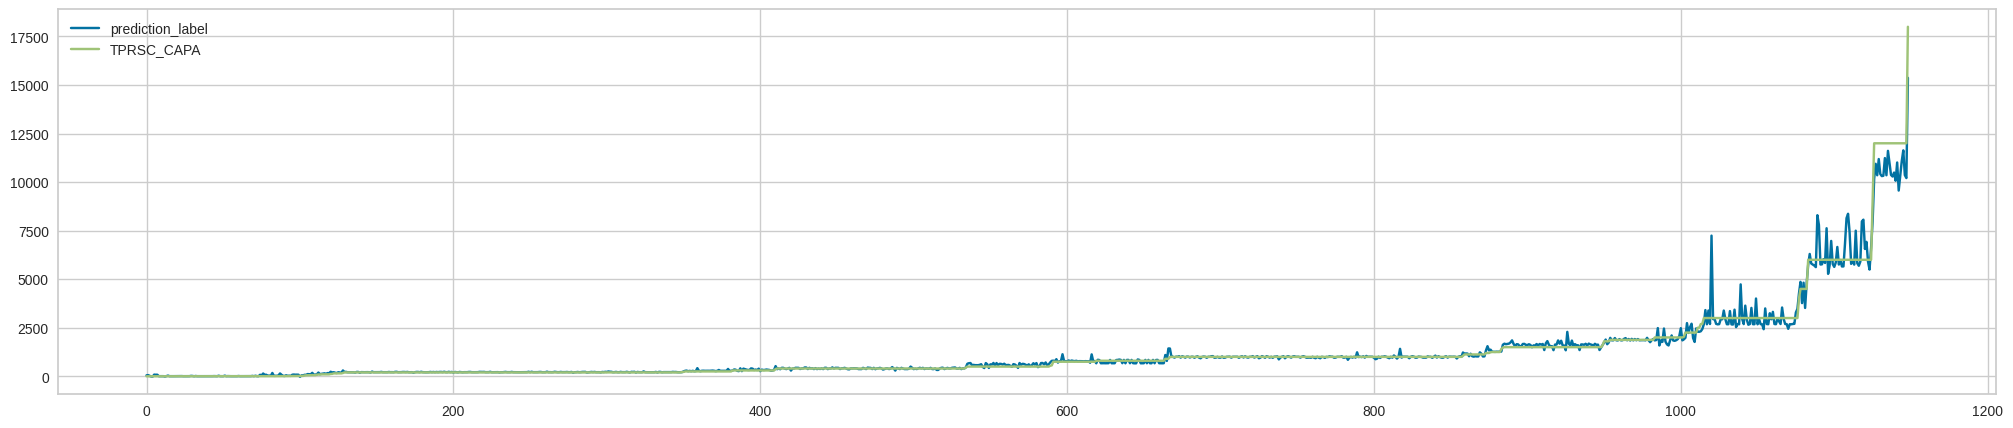

In [340]:
pred_last_2[['prediction_label','TPRSC_CAPA']].plot(figsize=(25, 5))